WE WILL DO BASIC IMPORTS INITIALLY


In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import sys
print(sys.executable)


C:\Program Files\Python313\python.exe


In [348]:
data= pd.read_csv('StudentPerformanceFactors.csv')
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [20]:
data[data.duplicated()==True].sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: object

In [63]:
data.isnull().nunique

<bound method DataFrame.nunique of       Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             False       False                 False                False   
1             False       False                 False                False   
2             False       False                 False                False   
3             False       False                 False                False   
4             False       False                 False                False   
...             ...         ...                   ...                  ...   
6602          False       False                 False                False   
6603          False       False                 False                False   
6604          False       False                 False                False   
6605          False       False                 False                False   
6606          False       False                 False                False   

      Extracurricular_Activi

In [105]:
idx=data[data.isnull().values==True].index
col=data[data.isnull().values==True].columns
col



In [114]:
for col in data.columns:
    data[col]=data[col].fillna(data[col].mode()[0])
data.isnull().sum()

        
        
    

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   float64
 2   Parental_Involvement        6607 non-null   float64
 3   Access_to_Resources         6607 non-null   float64
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   float64
 6   Previous_Scores             6607 non-null   float64
 7   Motivation_Level            6607 non-null   float64
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   float64
 11  Teacher_Quality             6607 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

**FINDING CORRELATIONS AND PLOTTING HEATMAP TO FIND OUT HOW MUCH THE FEATURES ARE CORRELATED WITH EACH OTHER**

<Axes: >

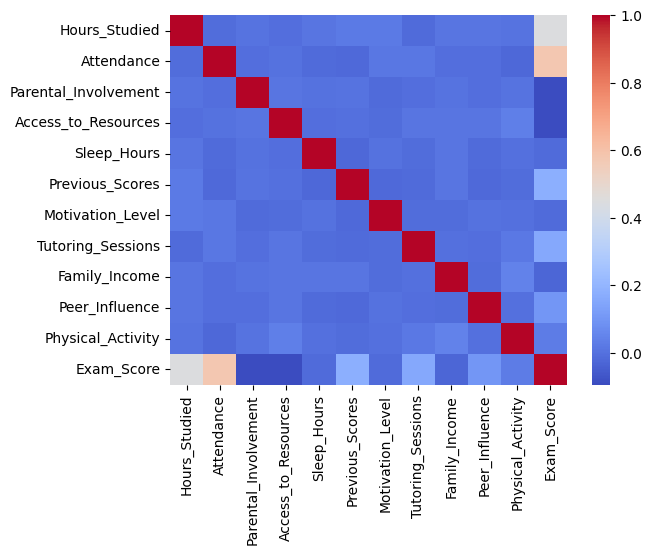

In [347]:
corr=data.corr(numeric_only=True)
sns.heatmap(corr,cmap='coolwarm')

here in the above  graph we see good correlation among attendance and  exam scores and no correlation among parental involvement  and access to resources with exam scores 


now its time for some encoding  for nominal variables 
for categorical variables we will use labelencoder
for  ordinal data we will use ordinal encoding

<Axes: xlabel='Motivation_Level', ylabel='count'>

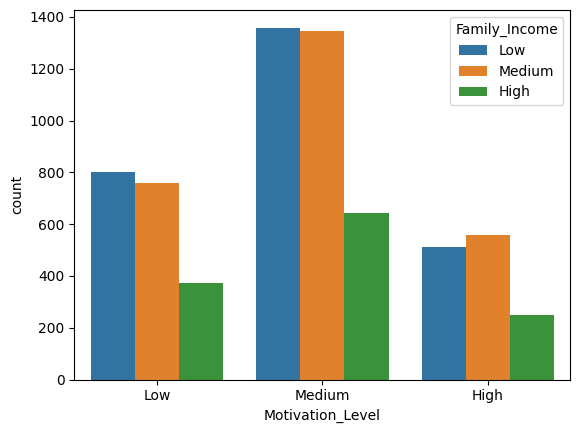

In [364]:
sns.countplot(x='Motivation_Level',data=data,hue='Family_Income')

MOST STUDENTS WITH LOW FAMILY INCOME  HAVE  MEDIUM MOTIVATION LEVEL 
AND STUDENTS WITH   MEDUM FAMILY INCOME  HAVE THE HIGHEST MOTIVATION LEVEL (DUE TO BETTER RESOURCES THAN  THOSE OF LOW INCOME)
THOSE WITH  HIGHER FAMILY INCOME HAVE HIGH MOTIVATION ARE LESS IN NUMBER THAN THOSE OF WITH LOW FAMILY INCOME AND MEDIUM  FAMILY INCOME AND THATS REASONABLE BECAUSE GETTING OVERRESOURCED IS  SOMETIMES BAD FOR STUDENTS DUE TO DISTRACTIONS 



<Axes: xlabel='Tutoring_Sessions', ylabel='count'>

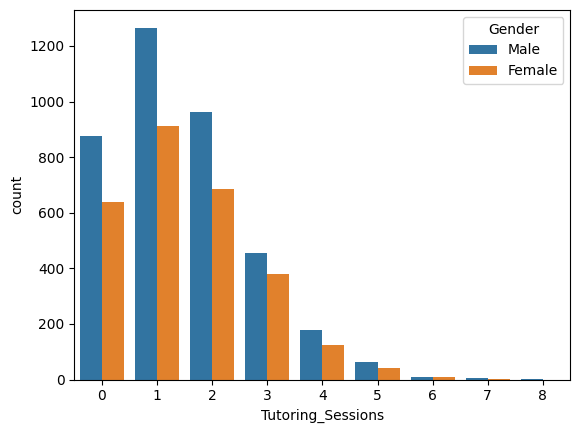

In [363]:
sns.countplot(x='Tutoring_Sessions',data=data,hue='Gender')

MORE MALES END UP TAKING MORE TUTORING SESSIONS THAN FEMALES 
MOST OF THE STUDENTS ARE COMFOTABLE OR BELEIVE IN TAKING 1  TUTORING SESSION IS SUFFICIENT  


<Axes: xlabel='Sleep_Hours', ylabel='Exam_Score'>

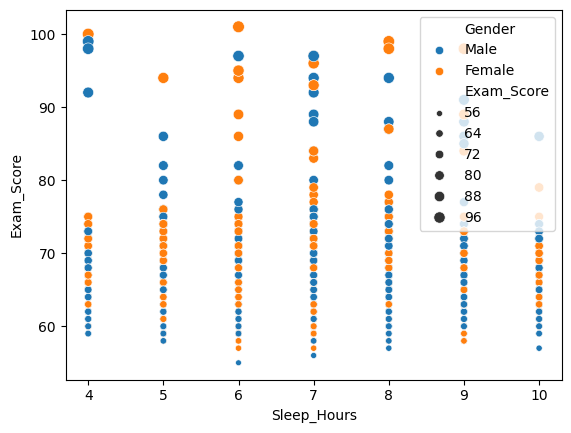

In [370]:
sns.scatterplot(x='Sleep_Hours',y='Exam_Score',data=data,hue='Gender',size='Exam_Score')

THIS DATA TELLS US SOME POINTS  ABOUT THE SCORES VS SLEEP 
WITHIN 4 TO  6 HOURS OF SLEEP  FEMALES ENDUP BEING THE HIGHEST SCORERS AS COMPARED TO MALES 
WITH 6 HOURS OF SLEEP  (THE SCIENTIFICALLY GOOD NUMBER) FEMALES ARE  WAY HIGHER THAN MALES IN SCORING 


         BIG CONCLUSION IS THAT : 6-8 HOURS OF  GOOD SLEEP HELPS STUDENTS PERFORM BETTER 

In [127]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder 
from sklearn.pipeline import Pipeline


In [123]:
ohe=OneHotEncoder()
le=LabelEncoder()
oe=OrdinalEncoder()


In [124]:
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [295]:
ordinal_features=['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Peer_Influence','Teacher_Quality']
label_features=['Extracurricular_Activities','Internet_Access','School_Type','Learning_Disabilities','Distance_from_Home','Parental_Education_Level','Gender']

from sklearn.compose import ColumnTransformer
Pipeline=ColumnTransformer(
        transformers=[('ordinal encoder', OrdinalEncoder(),ordinal_features),
                      ('onehotencoder',OneHotEncoder(),label_features)
                     ])
X=Pipeline.fit_transform(data)
dt=pd.DataFrame(X,columns=Pipeline.get_feature_names_out())
e=['Exam_Score']
l=ordinal_features+label_features




In [296]:
from sklearn.preprocessing import StandardScaler
scale_features=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores']
ss=StandardScaler()
j=ss.fit_transform(data[scale_features])
data[scale_features]=pd.DataFrame(j,columns=scale_features)
data


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.504942,0.348375,1.0,0.0,No,-0.019796,-0.143800,1.0,Yes,0,1.0,Medium,Public,2.0,3,No,High School,Near,Male,67
1,-0.162822,-1.383736,1.0,2.0,No,0.661399,-1.116110,1.0,Yes,2,2.0,Medium,Public,0.0,4,No,College,Moderate,Female,61
2,0.671882,1.560853,2.0,2.0,Yes,-0.019796,1.106313,2.0,Yes,2,2.0,Medium,Public,1.0,4,No,Postgraduate,Near,Male,74
3,1.506587,0.781403,1.0,2.0,Yes,0.661399,1.592469,2.0,Yes,1,2.0,Medium,Public,0.0,4,No,High School,Moderate,Male,71
4,-0.162822,1.041220,2.0,2.0,Yes,-0.700990,-0.699406,2.0,Yes,3,2.0,High,Public,1.0,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,0.0,2.0,No,-0.019796,0.064552,2.0,Yes,1,0.0,Medium,Public,2.0,2,No,High School,Near,Female,68
6603,0.504942,-0.344469,0.0,2.0,No,0.661399,0.411806,2.0,Yes,3,1.0,High,Public,2.0,2,No,High School,Near,Female,69
6604,0.004119,0.868009,2.0,1.0,Yes,-0.700990,-0.699406,1.0,Yes,3,1.0,Medium,Public,0.0,2,No,Postgraduate,Near,Female,68
6605,-1.665291,0.521587,0.0,0.0,Yes,-0.700990,1.106313,0.0,Yes,2,1.0,Medium,Private,2.0,3,No,High School,Far,Female,68


In [297]:
dt2=pd.concat([dt,data['Exam_Score']],axis=1)


In [298]:
dt1=data.drop(columns=l)



dtf=pd.concat([dt1,dt2],axis=1)

In [299]:
dtf# this is the final dataframe   on which we will apply  ml models and get exam scores prediction
#here our preprocessing and eda ends 





,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,ordinal encoder__Parental_Involvement,ordinal encoder__Access_to_Resources,ordinal encoder__Motivation_Level,...,onehotencoder__Learning_Disabilities_Yes,onehotencoder__Distance_from_Home_Far,onehotencoder__Distance_from_Home_Moderate,onehotencoder__Distance_from_Home_Near,onehotencoder__Parental_Education_Level_College,onehotencoder__Parental_Education_Level_High School,onehotencoder__Parental_Education_Level_Postgraduate,onehotencoder__Gender_Female,onehotencoder__Gender_Male,Exam_Score
0,0.504942,0.348375,-0.019796,-0.143800,0,3,67,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,67
1,-0.162822,-1.383736,0.661399,-1.116110,2,4,61,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,61
2,0.671882,1.560853,-0.019796,1.106313,2,4,74,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,74
3,1.506587,0.781403,0.661399,1.592469,1,4,71,1.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,71
4,-0.162822,1.041220,-0.700990,-0.699406,3,4,70,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,-0.019796,0.064552,1,2,68,0.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,68
6603,0.504942,-0.344469,0.661399,0.411806,3,2,69,0.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,69
6604,0.004119,0.868009,-0.700990,-0.699406,3,2,68,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,68
6605,-1.665291,0.521587,-0.700990,1.106313,2,3,68,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,68


In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [301]:
X=dtf.drop(columns='Exam_Score')
Y=dtf['Exam_Score']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [309]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)


In [310]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

In [311]:
print("scores over training data",mean_squared_error(y_train,y_train_pred)," | ",mean_absolute_error(y_train,y_train_pred)," | ",r2_score(y_train,y_train_pred))
print("scores over testing data",mean_squared_error(y_test,y_test_pred)," | ",mean_absolute_error(y_test,y_test_pred)," | ",r2_score(y_test,y_test_pred))


scores over training data 5.578406478019063  |  1.0306887126579038  |  0.6453854878944796
scores over testing data 4.143783286749387  |  0.9743915681474961  |  0.6984139779824055


so now this is the case of underfitting model  it performs bad on original data and better on new data now we will improve our model a bit  we will apply polynomial regression


In [313]:
from sklearn.preprocessing import PolynomialFeatures


In [322]:
pf=PolynomialFeatures(degree=2)
xp=pf.fit_transform(x_train)
xtp=pf.fit_transform(x_test)
yp=pf.fit_transform(y_train)
ytp=pf.fit_transform(y_test)
lnr=LinearRegression()
lnr.fit(xp,yp)
ypr=lnr.predict(xp)
ytpr=lnr.predict(xtp)
print("scores over training data",mean_squared_error(yp,ypr)," | ",mean_absolute_error(yp,ypr)," | ",r2_score(yp,ypr))
print("scores over testing data",mean_squared_error(ytp,ytpr)," | ",mean_absolute_error(ytp,ytpr)," | ",r2_score(ytp,ytpr))



scores over training data 54681.92744920178  |  49.309225060888174  |  0.7356317061201877
scores over testing data 40996.78686987324  |  46.280767424080615  |  0.7644654432677228


this model still is underfitting now we will increase the degree from 2 to three 

In [324]:
pf=PolynomialFeatures(degree=3)
xp=pf.fit_transform(x_train)
xtp=pf.fit_transform(x_test)
yp=pf.fit_transform(y_train)
ytp=pf.fit_transform(y_test)
lnr=LinearRegression()
lnr.fit(xp,yp)
ypr=lnr.predict(xp)
ytpr=lnr.predict(xtp)
print("scores over training data",mean_squared_error(yp,ypr)," | ",mean_absolute_error(yp,ypr)," | ",r2_score(yp,ypr))
print("scores over testing data",mean_squared_error(ytp,ytpr)," | ",mean_absolute_error(ytp,ytpr)," | ",r2_score(ytp,ytpr))


scores over training data 391263825.6073405  |  6584.791576889156  |  0.7998736580577337
scores over testing data 975871403.3867397  |  11428.710702034557  |  0.38446262260562397


now its overfitting case of model we will apply Ridge regression  now 


In [325]:
from sklearn.linear_model import Ridge 

In [329]:
alphas=[0.01,0.1,1,10,100,1000,10000]
for a in alphas:
    rr=Ridge(alpha=a)
    rr.fit(xp,yp)
    ypr=rr.predict(xp)
    ytpr=rr.predict(xtp)
    print("scores over training data for aplha={}".format(a),mean_squared_error(yp,ypr)," | ",mean_absolute_error(yp,ypr)," | ",r2_score(yp,ypr))
    print("scores over testing data for alpha={}".format(a),mean_squared_error(ytp,ytpr)," | ",mean_absolute_error(ytp,ytpr)," | ",r2_score(ytp,ytpr))
    

    

scores over training data for aplha=0.01 391263901.241716  |  6584.320191846261  |  0.7998736164343377
scores over testing data for alpha=0.01 975303932.7526348  |  11425.25283239407  |  0.38482807803930125
scores over training data for aplha=0.1 391270505.19319546  |  6580.2066605618875  |  0.7998699920226395
scores over testing data for alpha=0.1 970667908.1062622  |  11395.691069214907  |  0.38780512690426056
scores over training data for aplha=1 391565361.4678159  |  6550.149585754783  |  0.7997106691596815
scores over testing data for alpha=1 944289948.7152745  |  11214.834757451617  |  0.40452264312557373
scores over training data for aplha=10 395450721.5757412  |  6397.333051655153  |  0.7976602536675095
scores over testing data for alpha=10 867423001.5679047  |  10524.71639145382  |  0.4527100739080364
scores over training data for aplha=100 420647102.7065832  |  5903.132158824529  |  0.784484981101172
scores over testing data for alpha=100 696471248.0256128  |  8525.3915599306